In [1]:
import numpy as np
import pandas as pd

In [2]:
df_twitter=pd.read_csv("/home/karthik/Desktop/internship/Twitter_analysis/train.csv")

In [3]:
df_twitter.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


/home/karthik/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

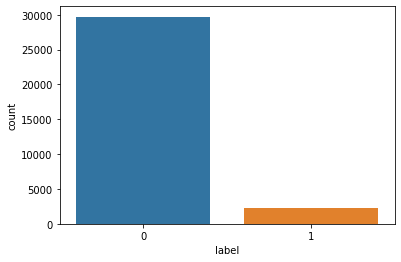

In [4]:
import seaborn as sns
sns.countplot('label',data=df_twitter)

In [5]:
df_twitter.drop('id',axis=1,inplace=True)

In [6]:
df_offensive =pd.read_csv("/home/karthik/Desktop/internship/labeled_data.csv")

In [7]:
df_offensive.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [8]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [9]:
df_offensive['class'].unique()

array([2, 1, 0])

/home/karthik/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

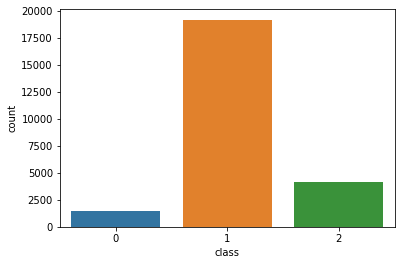

In [10]:
sns.countplot('class',data = df_offensive)

In [11]:
df_offensive[df_offensive['class']==0]['class']=1

/home/karthik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_offensive['class'].unique()

array([2, 1, 0])

In [13]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [14]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [15]:
df_offensive['class'].unique()

array([2, 1])

/home/karthik/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

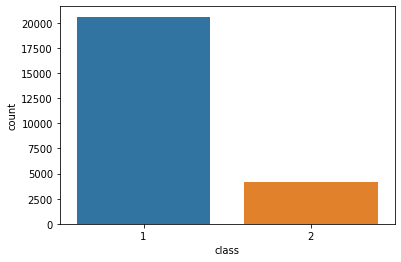

In [16]:
sns.countplot('class',data=df_offensive)

In [17]:
df_offensive[df_offensive['class']==0]

,class,tweet


In [18]:
df_offensive["class"].replace({2: 0}, inplace=True)

/home/karthik/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

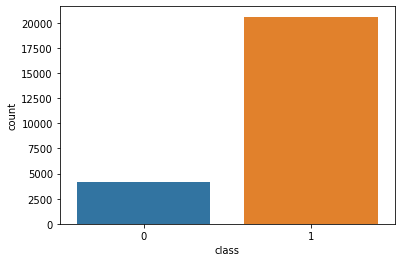

In [19]:
sns.countplot('class',data=df_offensive)

In [20]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [21]:
df_offensive.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [22]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [23]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

/home/karthik/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

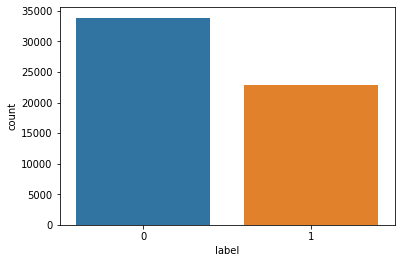

In [24]:
sns.countplot('label',data=df)

In [25]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/karthik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import re 
import nltk 
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words('english'))

In [28]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word.lower()not in stop_words]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [29]:
df['tweet']=df['tweet'].apply(clean_text)

In [30]:
df.to_csv('test.csv',index = False)

In [31]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [33]:
def make_wordcloud(df):
    comment_words=""
    for val in df.tweet: 
        val = str(val).lower()

      
        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [34]:
# make_wordcloud(df[df['label']==0])

df.to_csv('testing.csv',index=False)

In [35]:
x = df["tweet"]
y = df["label"]
type(x)

pandas.core.series.Series

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, random_state=42)
xtest

12238    kim k alright honest mani nigga id rather mile...
14377    rt bigjonbul star wink know smile see two love...
17207    rt sassymermaidxo   sister shittin hos vsamon ...
22168    tell  lookin ass nigga  ima crazi bitch that n...
18801     day ago  celebr nation ice tea day starbuck t...
                               ...                        
29909    singalong aiculati hangin round water cooler n...
9247                                          fuck boi fag
6861              pricelessxxx u good man long time niggah
12104     user great day dont forget send pic user user   
21552    famili ron oneal need sue wutang trash song re...
Name: tweet, Length: 14187, dtype: object

In [37]:
from sklearn.feature_extraction.text import CountVectorizer 
count = CountVectorizer(stop_words = 'english', ngram_range=(1,5))
xtrain_vectorizer = count.fit_transform(xtrain)
xtest_vectorizer = count.transform(xtest)

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

xtrain_tfidf = tfidf.fit_transform(xtrain_vectorizer)
xtest_tfidf = tfidf.transform(xtest_vectorizer)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
model_vectorizer= MultinomialNB().fit(xtrain_vectorizer, ytrain)
prediction_vectorizer=model_vectorizer.predict(xtest_vectorizer)
print(confusion_matrix(ytest,prediction_vectorizer))
print (classification_report(ytest, prediction_vectorizer))

[[7878  575]
 [ 458 5276]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8453
           1       0.90      0.92      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.93      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [41]:
model_tfidf = MultinomialNB().fit(xtrain_tfidf, ytrain)
prediction_tfidf = model_tfidf.predict(xtest_tfidf)
print (classification_report(ytest, prediction_tfidf))
print(confusion_matrix(ytest,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8453
           1       0.95      0.85      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.93      0.91      0.92     14187
weighted avg       0.92      0.92      0.92     14187

[[8213  240]
 [ 860 4874]]


In [42]:
#!pip install keras

In [43]:
#!pip install tensorflow

In [44]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [45]:
max_words = 50000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(xtrain)
sequences = tokenizer.texts_to_sequences(xtrain)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [46]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 500, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [47]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
stop = EarlyStopping(monitor='val_accuracy',
                     mode='max',
                     patience=5)

checkpoint= ModelCheckpoint(filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [48]:
test_sequences = tokenizer.texts_to_sequences(xtest)
test_sequences_metrix = sequence.pad_sequences(test_sequences,maxlen = max_len)

In [49]:
accuracy = model.evaluate(test_sequences_metrix,ytest)

444/444 [==============================] - 16s 36ms/step - loss: 0.6921 - accuracy: 0.5685


In [50]:
lstm_prediction=model.predict(test_sequences_metrix)

In [51]:
res = []
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [52]:
print(confusion_matrix(ytest,res))

[[6414 2039]
 [4083 1651]]


In [53]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [54]:
model.save('Hate & Offense_model.h5')

In [55]:
import keras
load_model = keras.models.load_model('./Hate & Offense_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [56]:
test = 'you are beautiful'
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("No Hate")
else:
    print("Hate & Offensive")

['beauti']
[[74]]
pred [[0.49706414]]
No Hate
